# Multi-layer splitting example from an icequake from Rutford Ice Stream, Antarctica

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import swspy
import obspy
from obspy import UTCDateTime
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
%matplotlib notebook

## 1. Load data for event:

In [3]:
station_to_analyse = "ST04"

# Load data:
# archive_path = "data/mseed"
mseed_file_path = "data/20090121042009180_ice_flow_dir_corrected.m"
archive_vs_file = "file"
nonlinloc_event_path = "data/loc.Tom__RunNLLoc000.20090121.042009.grid0.loc.hyp"

starttime = UTCDateTime("20090121T042009.18523") - 0.5
endtime = UTCDateTime("20090121T042009.18523") + 2.5
load_wfs_obj = swspy.io.load_waveforms(mseed_file_path, starttime=starttime, endtime=endtime, archive_vs_file=archive_vs_file)
load_wfs_obj.filter = True
load_wfs_obj.filter_freq_min_max = [1.0, 80.0]
st = load_wfs_obj.read_waveform_data()


## 2. Calculate splitting

Passed multi-layer result, therefore plotting this result.


<IPython.core.display.Javascript object>


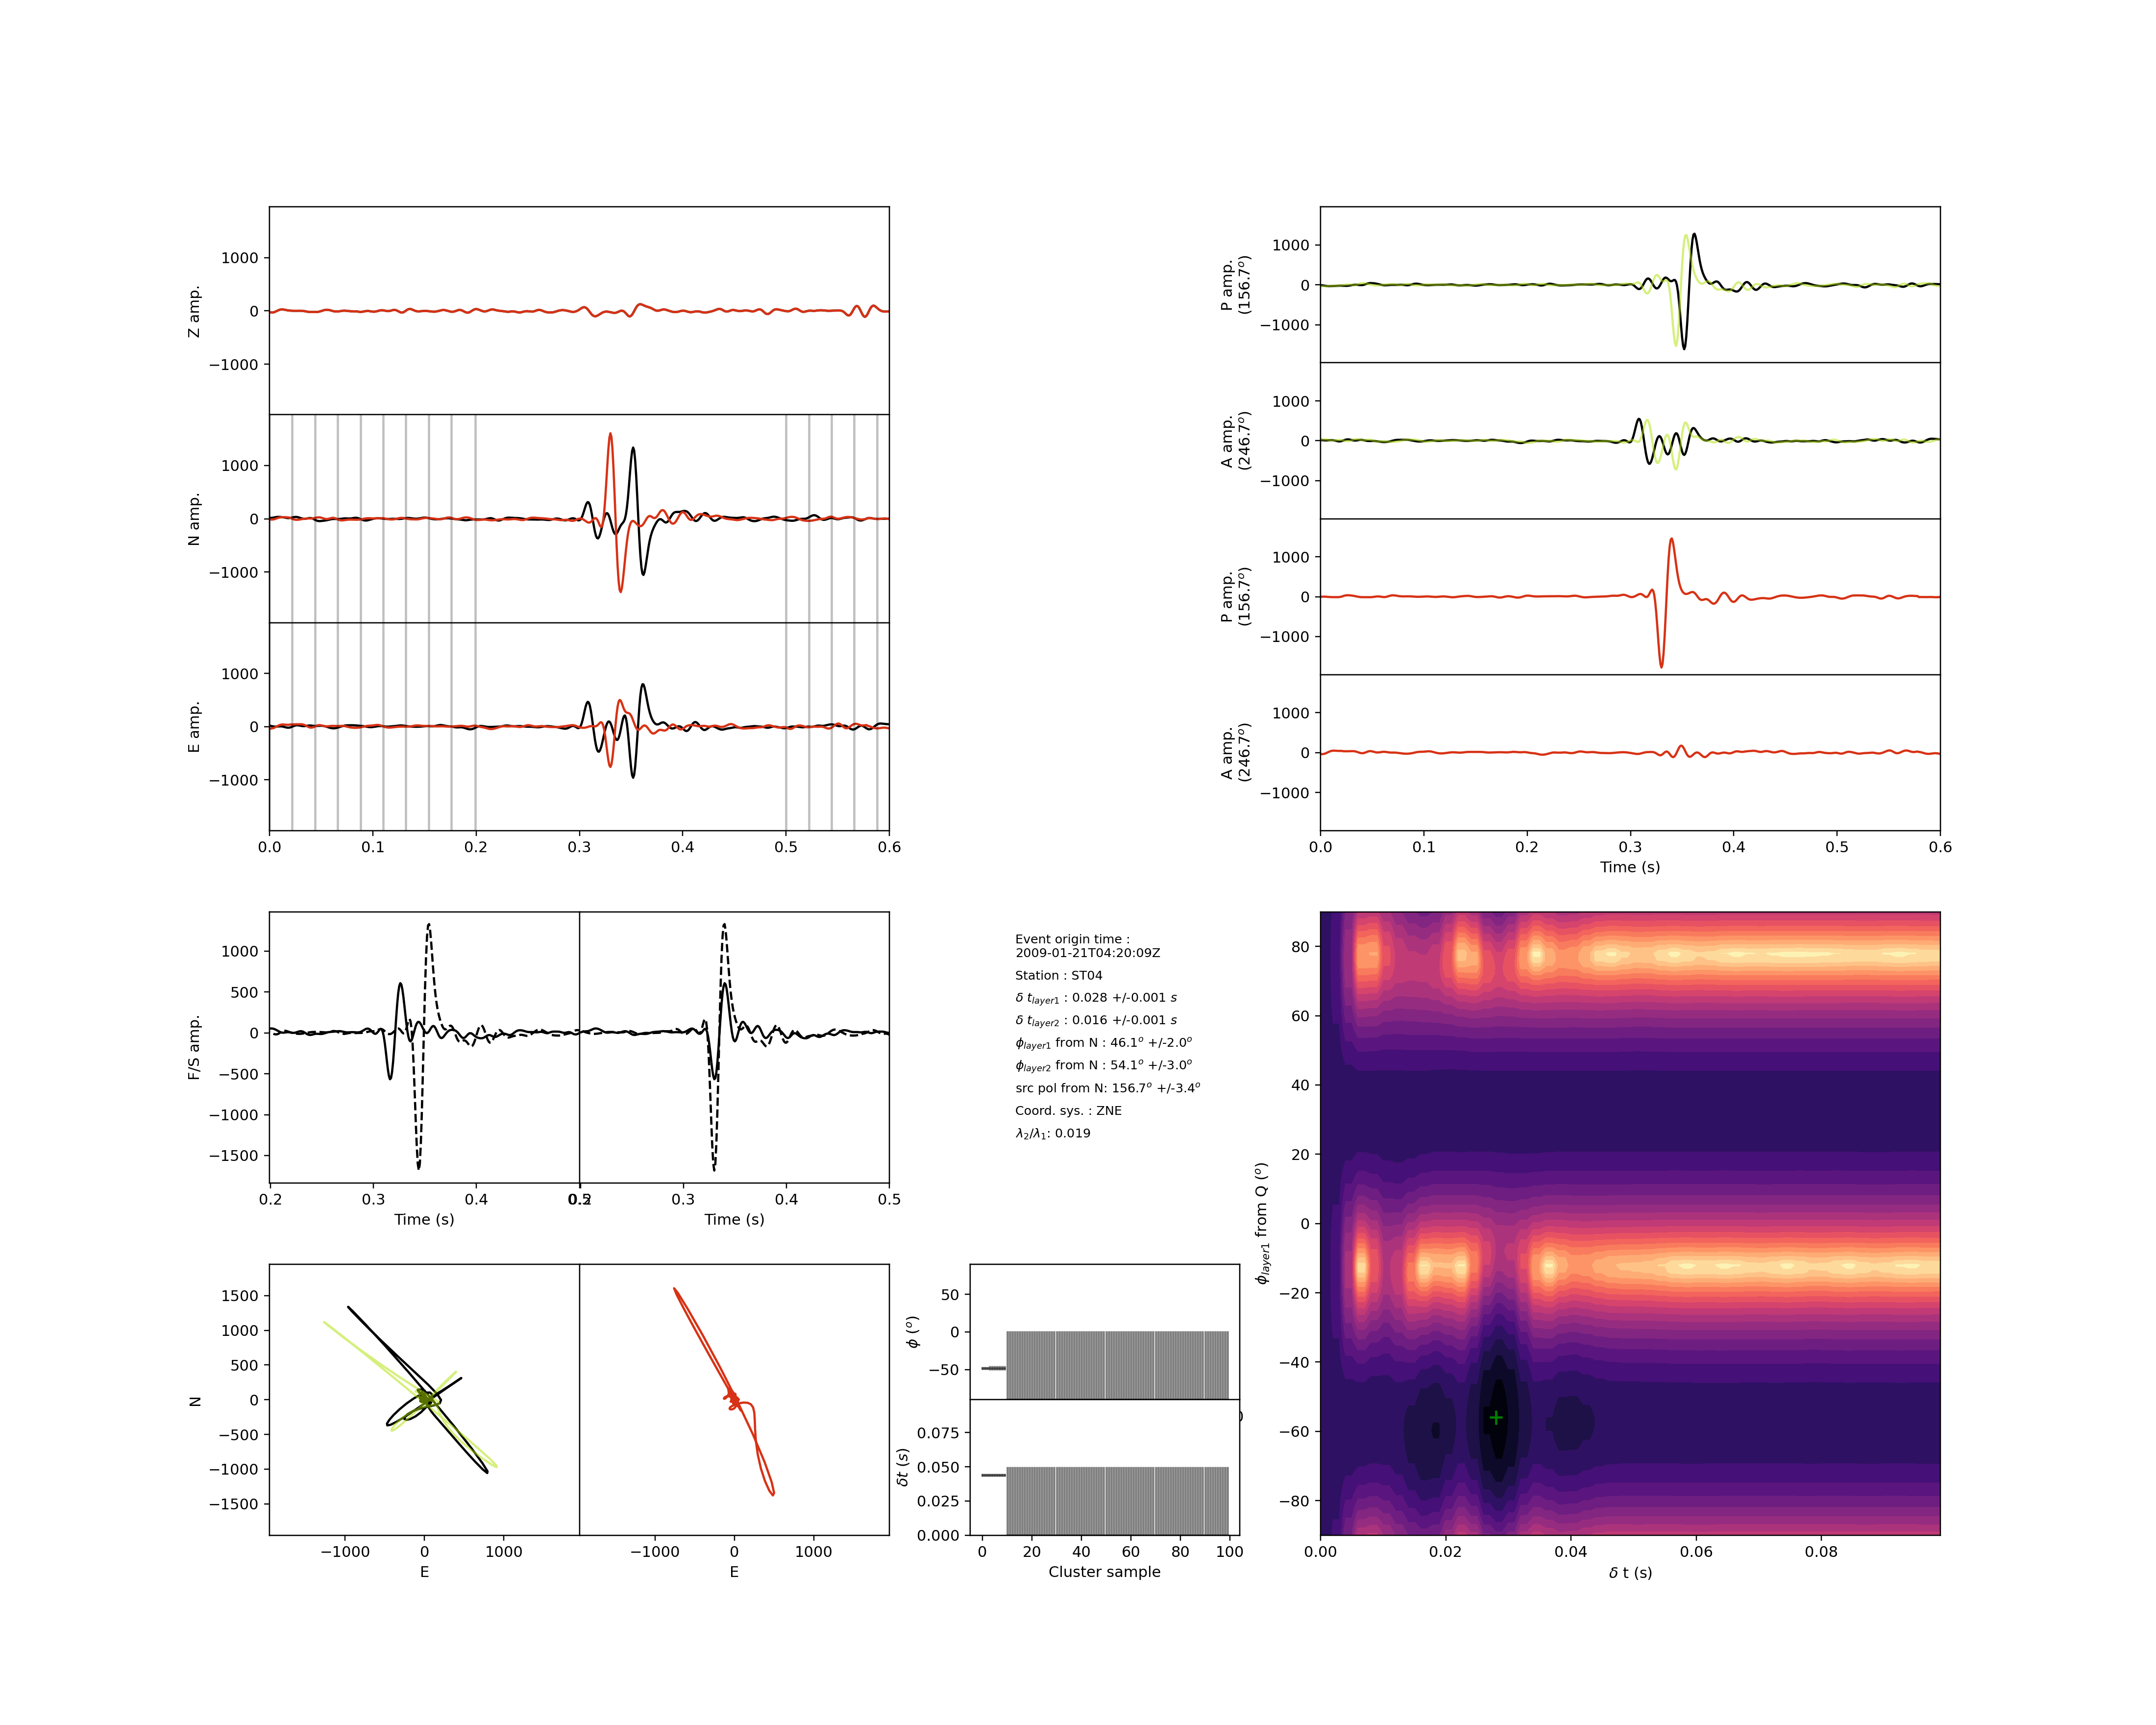

/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:1653: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  plt.savefig(os.path.join(outdir, ''.join((self.event_uid, "_", station, ".png"))), dpi=300)


Saved sws result to: multisplitting_plots/20090121042009_sws_result.csv


In [4]:
# Calculate splitting for multi-layer:
splitting_event_multi_layer = swspy.splitting.create_splitting_object(st.select(station=station_to_analyse), nonlinloc_event_path=nonlinloc_event_path) #(st, nonlinloc_event_path) #(st.select(station="ST01"), nonlinloc_event_path)
splitting_event_multi_layer.overall_win_start_pre_fast_S_pick = 0.3
splitting_event_multi_layer.win_S_pick_tolerance = 0.1
splitting_event_multi_layer.overall_win_start_post_fast_S_pick = 0.2
splitting_event_multi_layer.rotate_step_deg = 2.0 
splitting_event_multi_layer.max_t_shift_s = 0.1 
splitting_event_multi_layer.n_win = 10 #5 #10
splitting_event_multi_layer.perform_sws_analysis_multi_layer(coord_system="ZNE")

# Plot and save result:
splitting_event_multi_layer.plot(outdir="multisplitting_plots")
splitting_event_multi_layer.save_result(outdir="multisplitting_plots")